<a href="https://colab.research.google.com/github/bwaves26/statclass/blob/main/finalprojectv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
library(dplyr)
library(ggplot2)

In [10]:
police_killings <- read.csv("police_killings.csv")

In [11]:
head(police_killings)
View(police_killings)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,5.6,28375,51367,54766,0.9379359,3,3,14.1,0.09768638,0.16850951
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.5,14678,27972,40930,0.6834107,2,1,28.8,0.06572379,0.11140236
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,16.8,25286,45365,54930,0.8258693,2,3,14.6,0.16629314,0.14731227
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,98.8,17194,48295,55909,0.8638144,3,3,11.7,0.12482727,0.05013293
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.7,33954,68785,49669,1.3848678,5,4,1.9,0.06354983,0.40395421
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,79,15523,20833,53596,0.3887044,1,1,58,0.07365145,0.10295519


name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,5.6,28375,51367,54766,0.9379359,3,3,14.1,0.09768638,0.16850951
Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,0.5,14678,27972,40930,0.6834107,2,1,28.8,0.06572379,0.11140236
Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,16.8,25286,45365,54930,0.8258693,2,3,14.6,0.16629314,0.14731227
Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,98.8,17194,48295,55909,0.8638144,3,3,11.7,0.12482727,0.05013293
Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,1.7,33954,68785,49669,1.3848678,5,4,1.9,0.06354983,0.40395421
Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,79,15523,20833,53596,0.3887044,1,1,58,0.07365145,0.10295519
Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,⋯,44.2,25949,58068,48552,1.1959960,4,4,17.2,0.13146113,0.20380117
Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,⋯,84.1,25043,66543,55909,1.1902019,4,4,12.2,0.09434698,0.09043760
Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,⋯,66.3,16778,30391,38310,0.7932916,2,1,37.7,0.14083298,0.04760134


Warning message:
“There were 10 warnings in `filter()`.
The first warning was:
ℹ In argument: `&...`.
Caused by warning in `grepl()`:
! unable to translate 'Rub<cc>_<e5><a9>n Garc<cc>__a Villalpando' to a wide string
ℹ Run `dplyr::last_dplyr_warnings()` to see the 9 remaining warnings.”


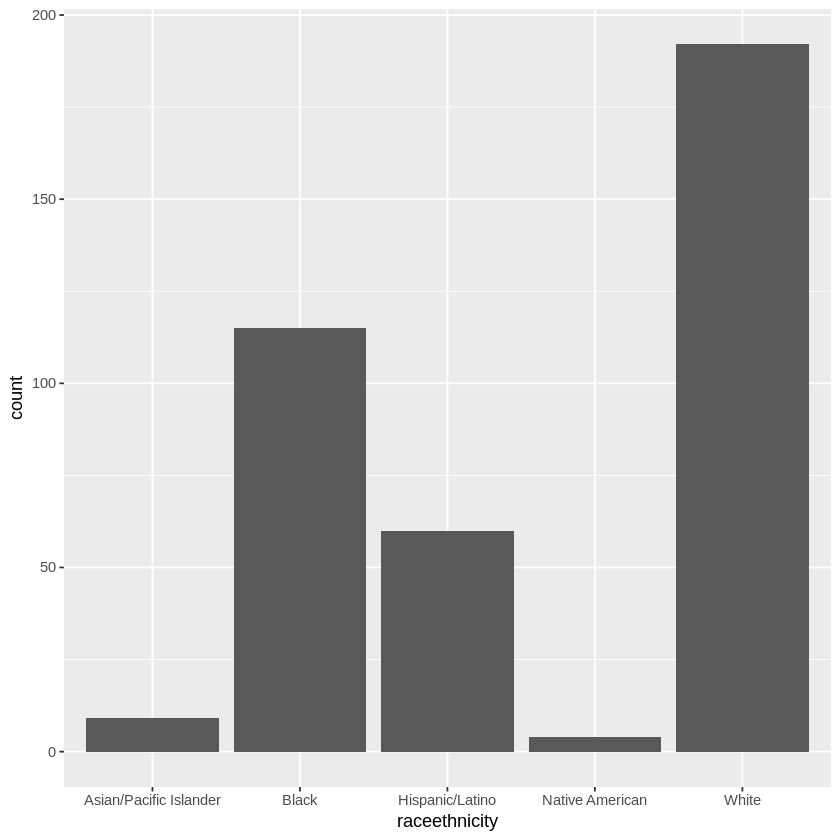

In [12]:
police_killings_clean <- police_killings %>%
  filter(if_all(everything(), ~ !grepl("unknown|^0$", ., ignore.case = TRUE)))%>%
  filter(!is.na(county_bucket))

police_killings_clean %>%
  ggplot()+
  aes(x= raceethnicity)+
  geom_bar()



In [13]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    pop = as.numeric(pop),
    share_white = as.numeric(share_white),
    share_black = as.numeric(share_black),
    share_hispanic = as.numeric(share_hispanic)
  )

In [14]:
police_killings_clean <- police_killings_clean %>%
  mutate(
    whitepop = pop * share_white / 100,
    blackpop = pop * share_black / 100,
    hispanicpop = pop * share_hispanic / 100
  )

In [15]:
black_total_pop <- sum(police_killings_clean$blackpop)
white_total_pop <- sum(police_killings_clean$whitepop)
hispanic_total_pop <- sum(police_killings_clean$hispanicpop)

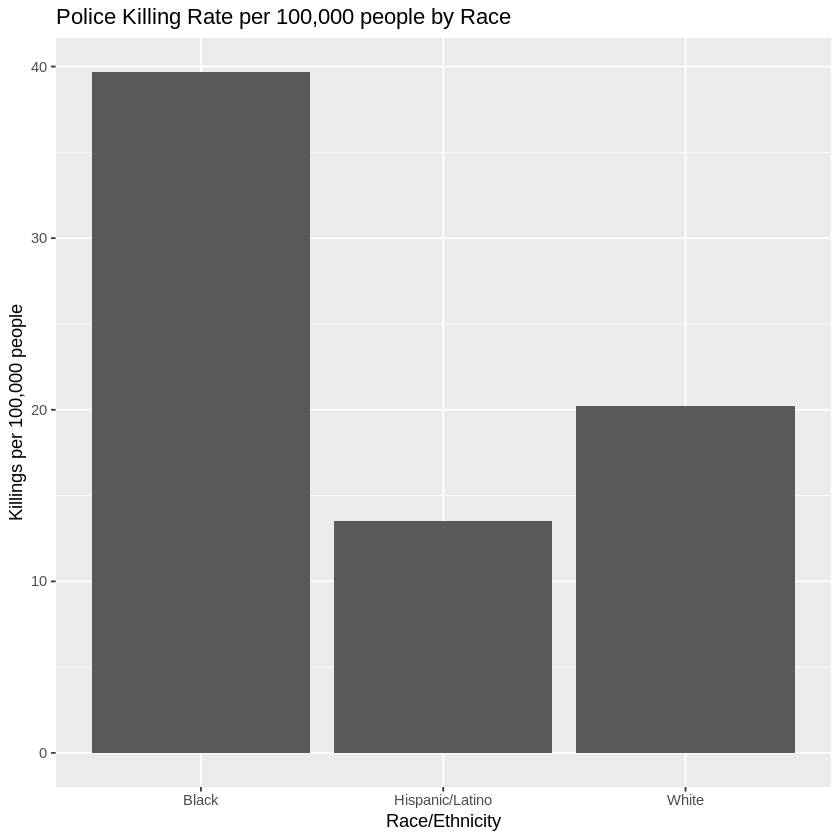

In [17]:
killings_by_race <- police_killings_clean %>%
  group_by(raceethnicity) %>%
  summarize(killings = n())


population_by_race <- data.frame(
  raceethnicity = c("White", "Black", "Hispanic/Latino"),
  population = c(white_total_pop, black_total_pop, hispanic_total_pop)
)


killings_and_population <- merge(killings_by_race, population_by_race, by = "raceethnicity")


killings_and_population <- killings_and_population %>%
  mutate(rate = (killings / population) * 100000)

ggplot(killings_and_population, aes(x = raceethnicity, y = rate)) +
  geom_col() +
  labs(title = "Police Killing Rate per 100,000 people by Race",
       x = "Race/Ethnicity",
       y = "Killings per 100,000 people")


In [18]:
killings_and_population

raceethnicity,killings,population,rate
<chr>,<int>,<dbl>,<dbl>
Black,115,289821.2,39.67964
Hispanic/Latino,60,443261.8,13.53602
White,192,950884.1,20.19174


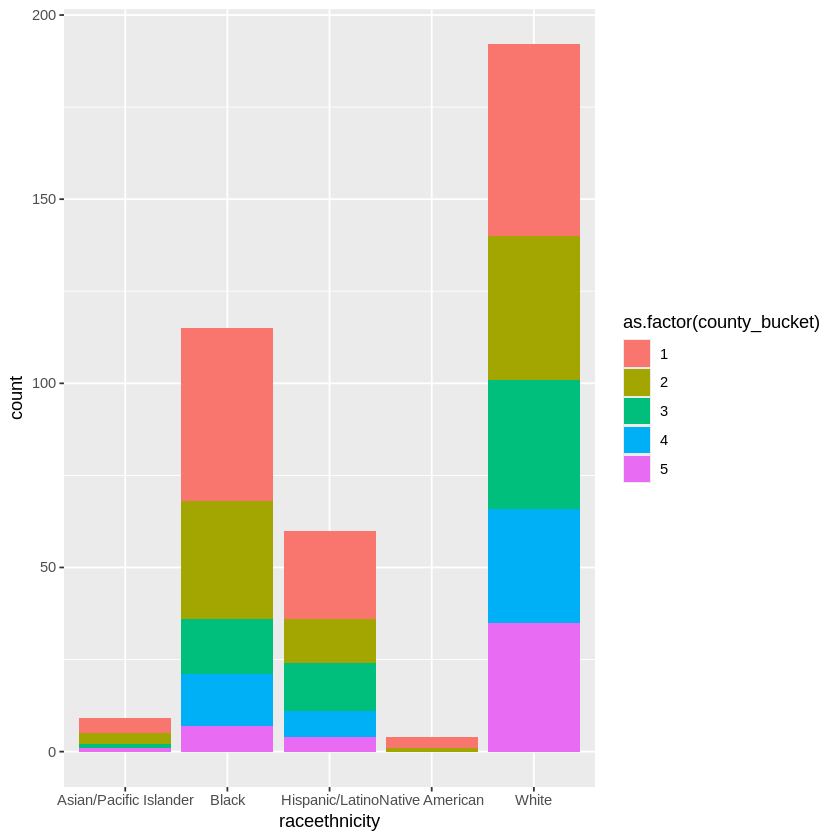

In [19]:
police_killings_clean %>%
  ggplot() +
  aes(x = raceethnicity, fill = as.factor(county_bucket)) +
  geom_bar()

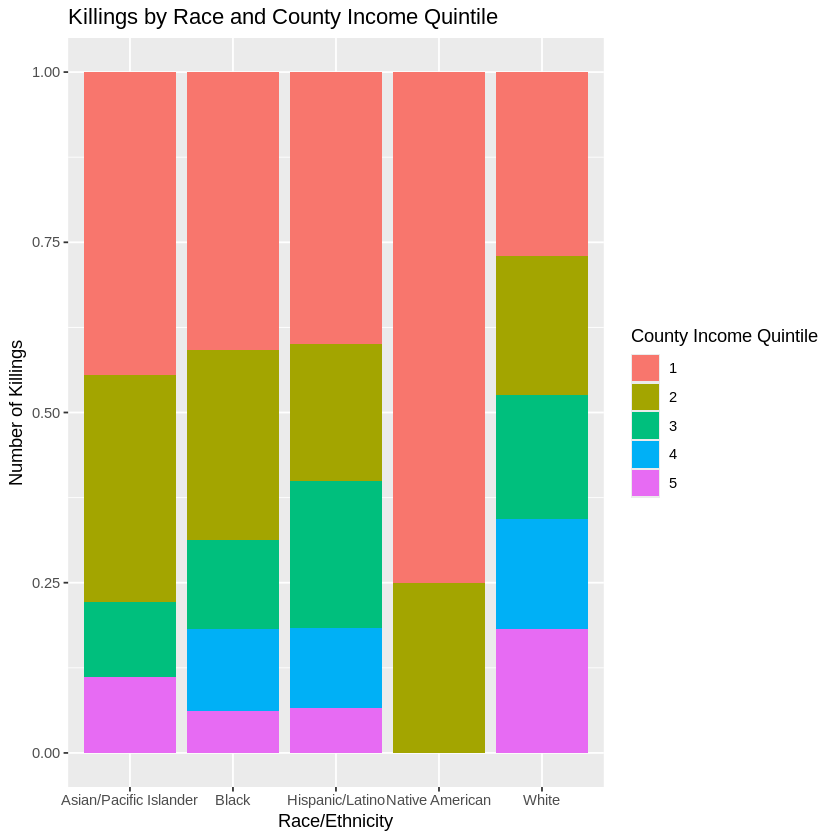

In [20]:
ggplot(police_killings_clean, aes(x = raceethnicity, fill = as.factor(county_bucket))) +
  geom_bar(position = "fill") +
  labs(title = "Killings by Race and County Income Quintile",
       x = "Race/Ethnicity",
       y = "Number of Killings",
       fill = "County Income Quintile")

Warning message in chisq.test(police_killings_clean$raceethnicity, police_killings_clean$nat_bucket):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  police_killings_clean$raceethnicity and police_killings_clean$nat_bucket
X-squared = 17.569, df = 16, p-value = 0.3498



`summarise()` has grouped output by 'county_bucket'. You can override using the
`.groups` argument.


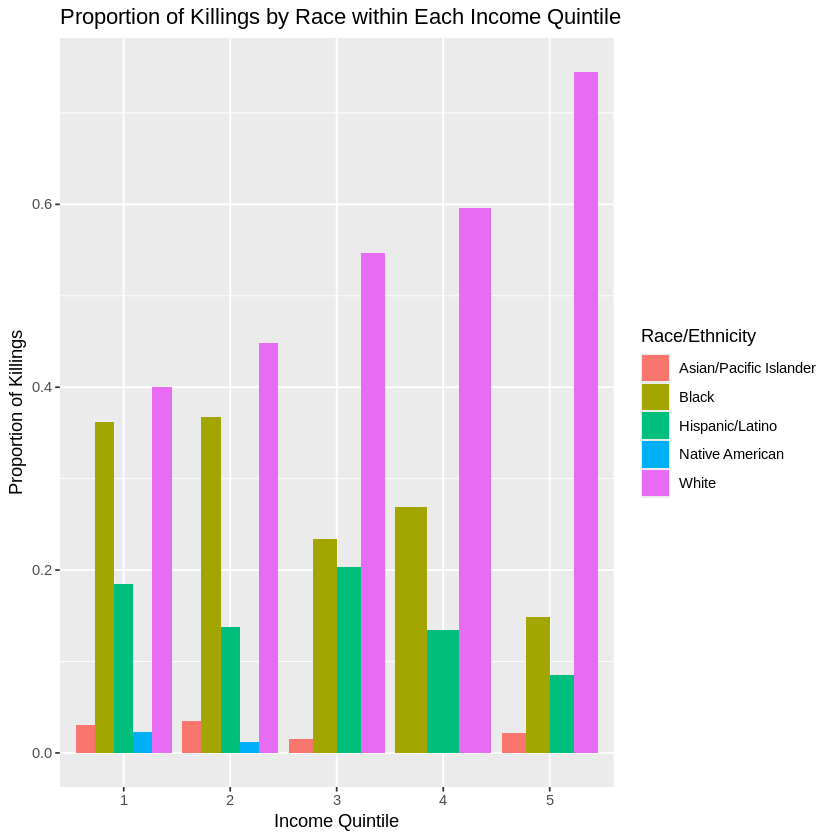

In [40]:
# prompt: do a test to see the probability of income quintile being much larger than the other

# Chi-squared test for independence between race and income quintile
chisq_test <- chisq.test(police_killings_clean$raceethnicity, police_killings_clean$nat_bucket)
print(chisq_test)

# Calculate proportions for each race within each income quintile
quintile_proportions <- police_killings_clean %>%
  group_by(county_bucket, raceethnicity) %>%
  summarise(n = n()) %>%
  mutate(proportion = n / sum(n))

# Visualize the proportions
ggplot(quintile_proportions, aes(x = as.factor(county_bucket), y = proportion, fill = raceethnicity)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Proportion of Killings by Race within Each Income Quintile",
       x = "Income Quintile",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity")

# Perform pairwise comparisons if the chi-squared test is significant
if(chisq_test$p.value < 0.05) {
  pairwise_comparisons <- pairwise.prop.test(
    x = quintile_proportions$n,
    n = rep(sum(quintile_proportions$n), length(unique(quintile_proportions$county_bucket))),
    p.adjust.method = "bonferroni" # Adjust p-values for multiple comparisons
  )
  print(pairwise_comparisons)
}

Warning message in chisq.test(police_killings_clean$raceethnicity, police_killings_clean$nat_bucket):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  police_killings_clean$raceethnicity and police_killings_clean$nat_bucket
X-squared = 17.569, df = 16, p-value = 0.3498



`summarise()` has grouped output by 'nat_bucket'. You can override using the
`.groups` argument.


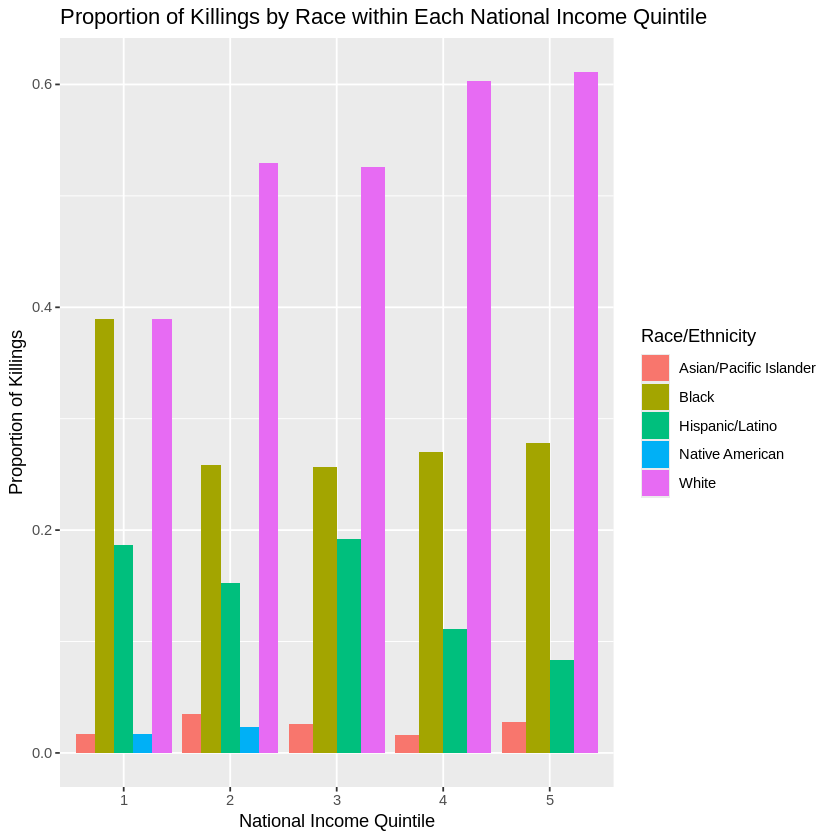

In [41]:
# prompt: set up a chi sq test that tests if the national quintile distribution is similar across races

# Chi-squared test for independence between race and national income quintile
chisq_test_national <- chisq.test(police_killings_clean$raceethnicity, police_killings_clean$nat_bucket)
print(chisq_test_national)

# Calculate proportions for each race within each national income quintile
national_quintile_proportions <- police_killings_clean %>%
  group_by(nat_bucket, raceethnicity) %>%
  summarise(n = n()) %>%
  mutate(proportion = n / sum(n))

# Visualize the proportions for national income quintiles
ggplot(national_quintile_proportions, aes(x = as.factor(nat_bucket), y = proportion, fill = raceethnicity)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Proportion of Killings by Race within Each National Income Quintile",
       x = "National Income Quintile",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity")

# Perform pairwise comparisons for national quintiles if the chi-squared test is significant
if(chisq_test_national$p.value < 0.05) {
  pairwise_comparisons_national <- pairwise.prop.test(
    x = national_quintile_proportions$n,
    n = rep(sum(national_quintile_proportions$n), length(unique(national_quintile_proportions$nat_bucket))),
    p.adjust.method = "bonferroni" # Adjust p-values for multiple comparisons
  )
  print(pairwise_comparisons_national)
}

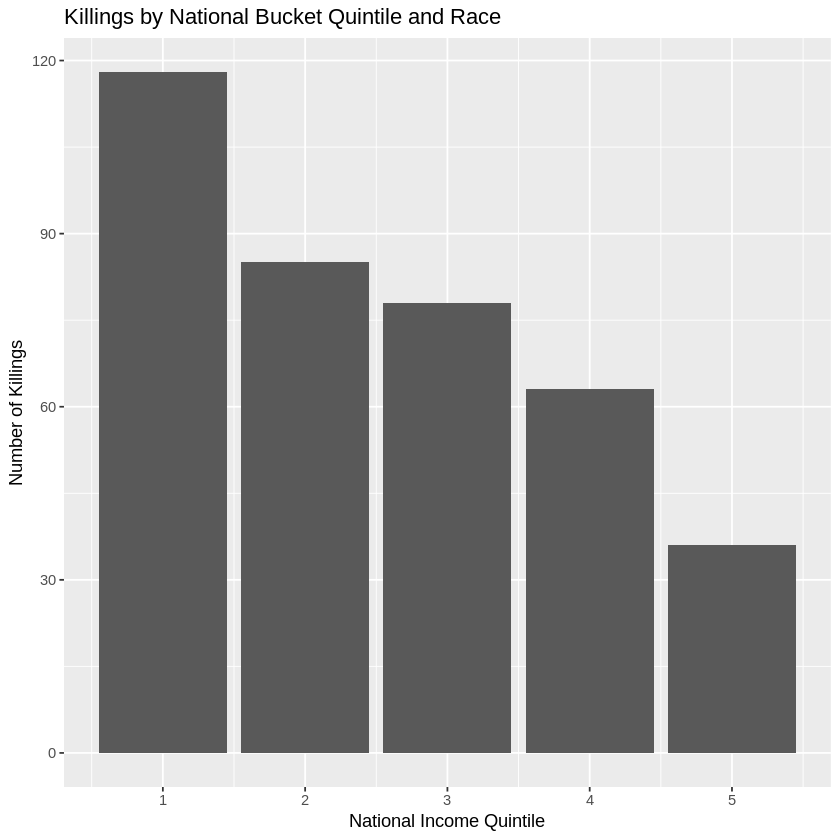

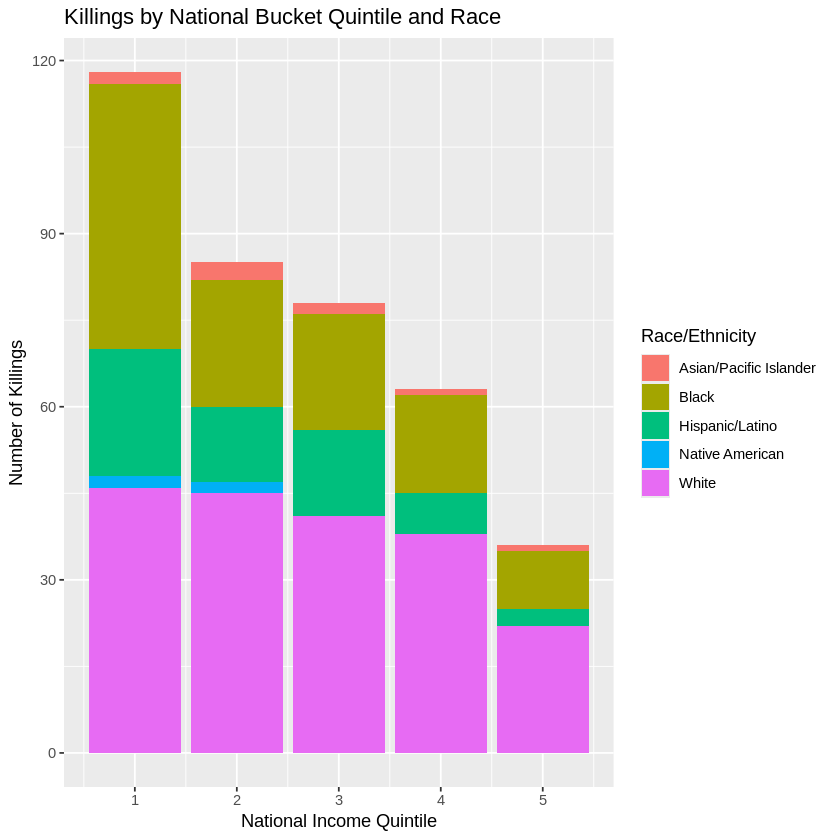

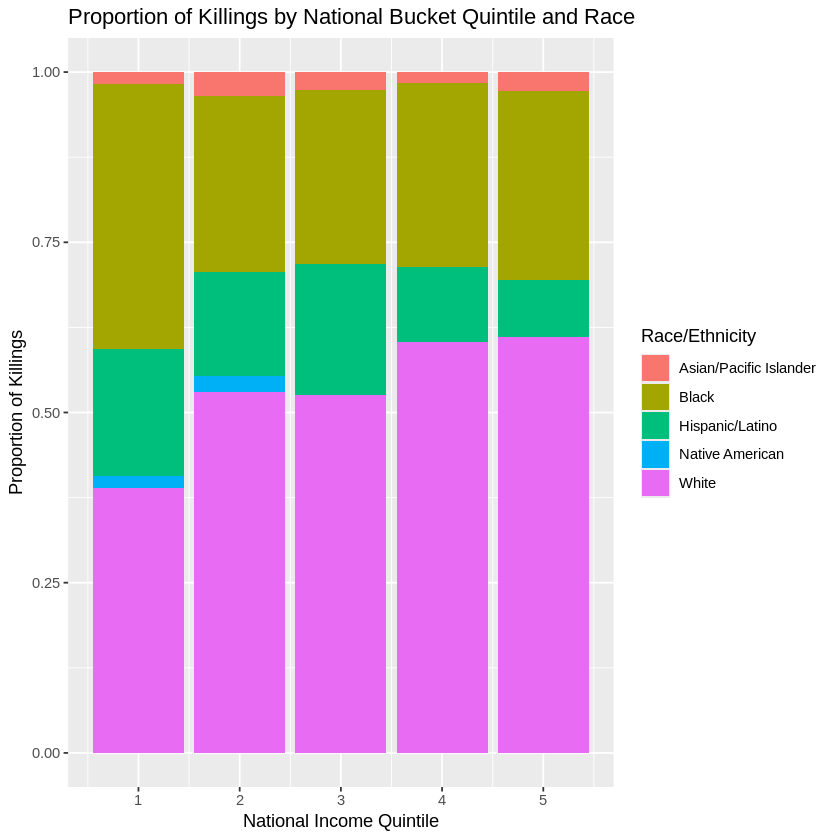

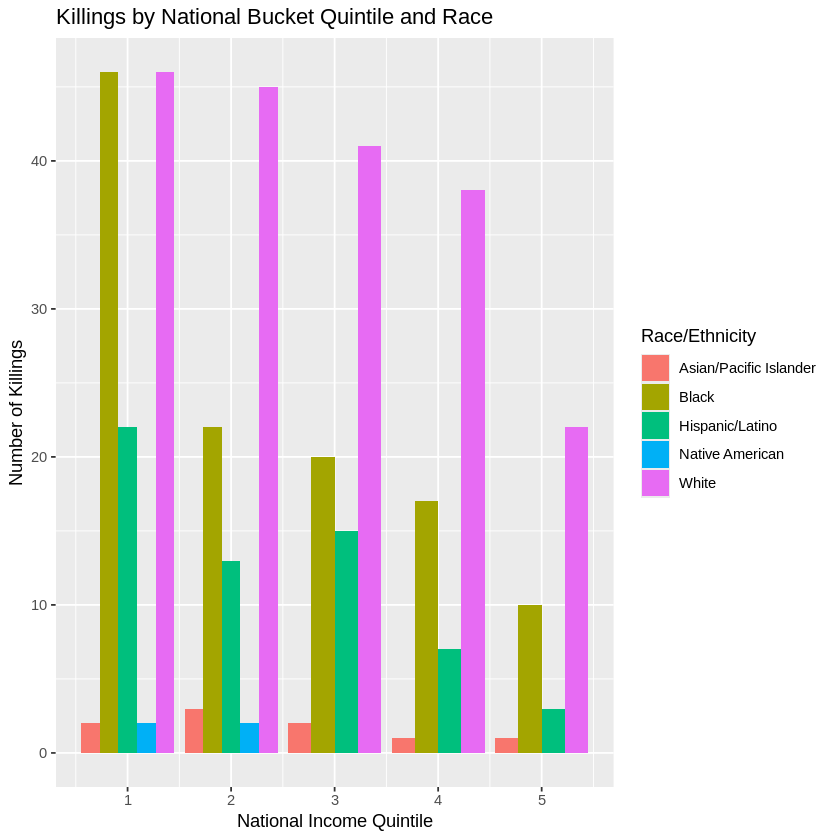

In [21]:
ggplot(police_killings_clean, aes(x = nat_bucket)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Number of Killings")

ggplot(police_killings_clean, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar() +
  labs(title = "Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

ggplot(police_killings_clean, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity")

ggplot(police_killings_clean, aes(x = nat_bucket, fill = raceethnicity)) +
  geom_bar(position = "dodge") +
  labs(title = "Killings by National Bucket Quintile and Race",
       x = "National Income Quintile",
       y = "Number of Killings",
       fill = "Race/Ethnicity")

In [22]:
quintile1_2 <- police_killings_clean %>%
  filter(nat_bucket == 1 | nat_bucket == 2)

In [23]:
mean(quintile1_2$pop)
mean(police_killings_clean$pop)

[1] 4260.596

[1] 4842.203

In [24]:
summary(police_killings_clean)

     name               age               gender          raceethnicity     
 Length:380         Length:380         Length:380         Length:380        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month                day             year      streetaddress     
 Length:380         Min.   : 1.00   Min.   :2015   Length:380        
 Class :character   1st Qu.: 8.00   1st Qu.:2015   Class :character  
 Mode  :character   Median :15.00   Median :2015   Mode  :character  
                    Mean   :15.53   Mean   :2015                     
                    3rd Qu.:22.00   3rd Qu.:2015                     
                    Max.   :31.00   Max. 

In [25]:
summary(quintile1_2)

     name               age               gender          raceethnicity     
 Length:203         Length:203         Length:203         Length:203        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month                day             year      streetaddress     
 Length:203         Min.   : 1.00   Min.   :2015   Length:203        
 Class :character   1st Qu.: 8.00   1st Qu.:2015   Class :character  
 Mode  :character   Median :16.00   Median :2015   Mode  :character  
                    Mean   :15.55   Mean   :2015                     
                    3rd Qu.:23.00   3rd Qu.:2015                     
                    Max.   :31.00   Max. 

In [26]:
police_killings_clean %>%
  count(state)

state,n
<chr>,<int>
AK,2
AL,7
AR,3
AZ,20
CA,63
CO,10
CT,1
DC,1
DE,2


comparing summary stats, unemployment is up and college education is down in lower income areas

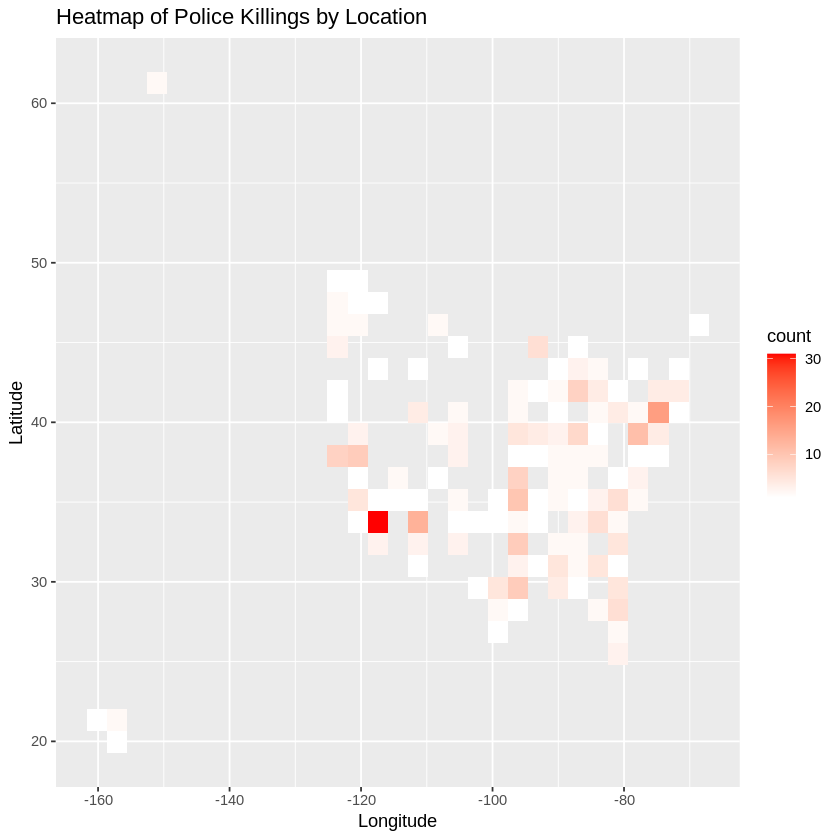

In [28]:
ggplot(police_killings_clean, aes(x = longitude, y = latitude)) +
  geom_bin2d() +
  labs(title = "Heatmap of Police Killings by Location",
       x = "Longitude",
       y = "Latitude") +
  scale_fill_gradient(low = "white", high = "red")

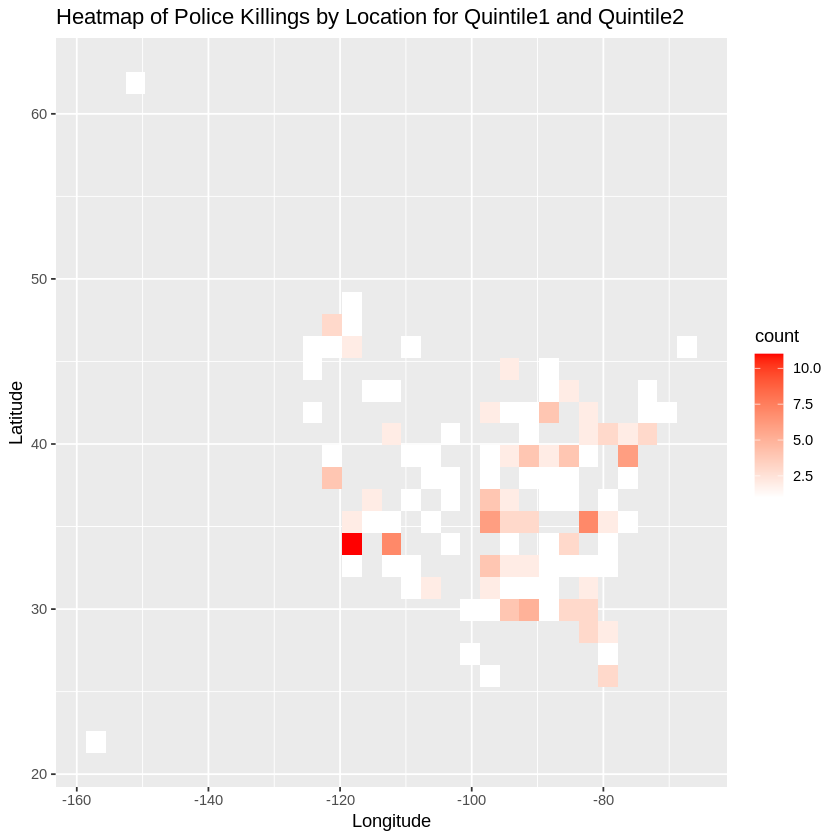

In [27]:
ggplot(quintile1_2, aes(x = longitude, y = latitude)) +
  geom_bin2d() +
  labs(title = "Heatmap of Police Killings by Location for Quintile1 and Quintile2",
       x = "Longitude",
       y = "Latitude") +
  scale_fill_gradient(low = "white", high = "red")

In [29]:
head(police_killings_clean)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,⋯,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,whitepop,blackpop,hispanicpop
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,⋯,54766,0.9379359,3,3,14.1,0.09768638,0.16850951,2286.295,1152.595,211.624
2,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,⋯,40930,0.6834107,2,1,28.8,0.06572379,0.11140236,1489.722,1002.378,13.845
3,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,⋯,54930,0.8258693,2,3,14.6,0.16629314,0.14731227,3010.302,314.083,685.272
4,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,⋯,55909,0.8638144,3,3,11.7,0.12482727,0.05013293,52.116,26.058,4290.884
5,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,⋯,49669,1.3848678,5,4,1.9,0.06354983,0.40395421,6298.325,95.326,115.753
6,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,⋯,53596,0.3887044,1,1,58,0.07365145,0.10295519,327.740,360.514,3698.780


In [30]:
subset_killings <- police_killings_clean %>%
  filter(state %in% c("CA", "TX", "FL"))

In [31]:
tex_killings <- police_killings_clean %>%
  filter(state %in% c("TX"))
cal_killings <- police_killings_clean %>%
  filter(state %in% c("CA"))
flo_killings <- police_killings_clean %>%
  filter(state %in% c("FL"))

In [ ]:
summary.table<-  %>%
  group_by(state) %>%

In [33]:
summary(police_killings_clean)
summary(tex_killings)
summary(cal_killings)
summary(flo_killings)

     name               age               gender          raceethnicity     
 Length:380         Length:380         Length:380         Length:380        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month                day             year      streetaddress     
 Length:380         Min.   : 1.00   Min.   :2015   Length:380        
 Class :character   1st Qu.: 8.00   1st Qu.:2015   Class :character  
 Mode  :character   Median :15.00   Median :2015   Mode  :character  
                    Mean   :15.53   Mean   :2015                     
                    3rd Qu.:22.00   3rd Qu.:2015                     
                    Max.   :31.00   Max. 

     name               age               gender          raceethnicity     
 Length:37          Length:37          Length:37          Length:37         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month                day             year      streetaddress     
 Length:37          Min.   : 2.00   Min.   :2015   Length:37         
 Class :character   1st Qu.: 9.00   1st Qu.:2015   Class :character  
 Mode  :character   Median :15.00   Median :2015   Mode  :character  
                    Mean   :15.76   Mean   :2015                     
                    3rd Qu.:21.00   3rd Qu.:2015                     
                    Max.   :31.00   Max. 

     name               age               gender          raceethnicity     
 Length:63          Length:63          Length:63          Length:63         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month                day             year      streetaddress     
 Length:63          Min.   : 1.00   Min.   :2015   Length:63         
 Class :character   1st Qu.: 8.50   1st Qu.:2015   Class :character  
 Mode  :character   Median :15.00   Median :2015   Mode  :character  
                    Mean   :15.51   Mean   :2015                     
                    3rd Qu.:23.00   3rd Qu.:2015                     
                    Max.   :30.00   Max. 

     name               age               gender          raceethnicity     
 Length:23          Length:23          Length:23          Length:23         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    month                day             year      streetaddress     
 Length:23          Min.   : 4.00   Min.   :2015   Length:23         
 Class :character   1st Qu.: 9.00   1st Qu.:2015   Class :character  
 Mode  :character   Median :15.00   Median :2015   Mode  :character  
                    Mean   :15.74   Mean   :2015                     
                    3rd Qu.:22.00   3rd Qu.:2015                     
                    Max.   :31.00   Max. 

by age?
distribution of killings per race by age

In [ ]:
police_killings_clean <- police_killings_clean %>%
  mutate(age = as.numeric(age))

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

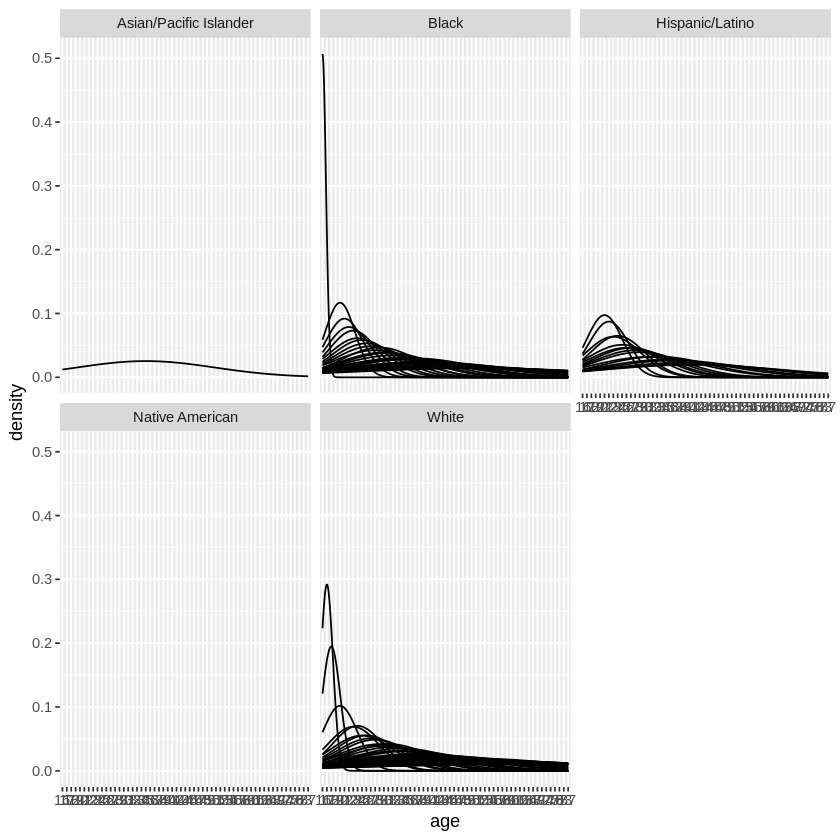

In [34]:
police_killings_clean %>%
  ggplot()+
  aes(x = age)+
  geom_density()+
  facet_wrap(~ raceethnicity)

In [ ]:
quintile1_2 %>%
  ggplot()+
  aes(x = age)+
  geom_density()+
  facet_wrap(~ raceethnicity)

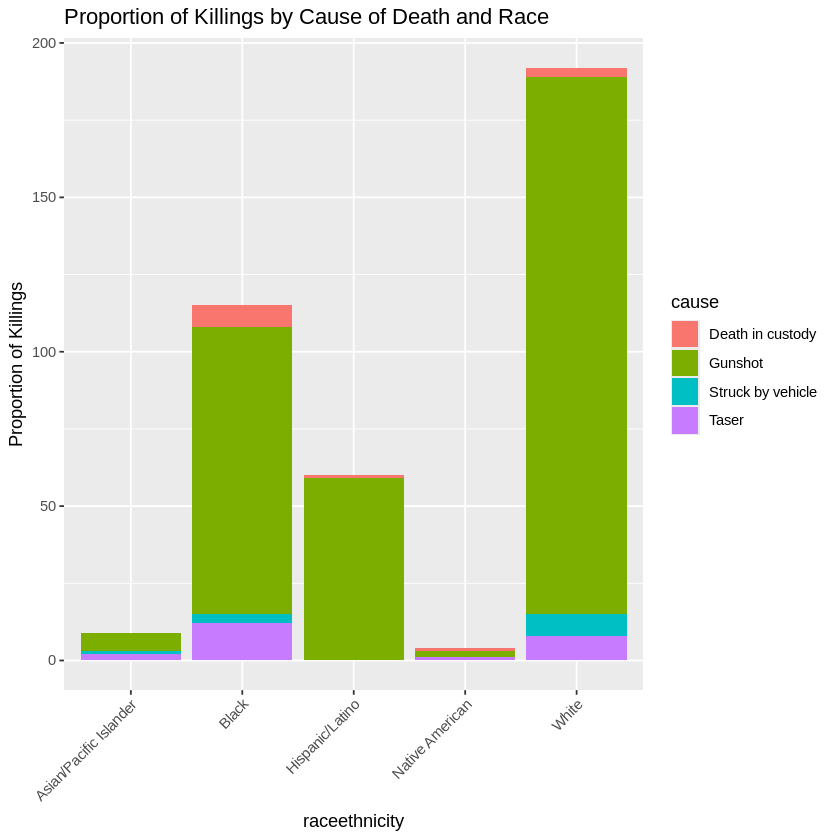

In [38]:
# prompt: cause of death on x axis stack by race per 100 incidents of each

# Assuming 'cause' is the column representing cause of death
ggplot(police_killings_clean, aes(x = raceethnicity, fill = cause)) +
  geom_bar(position = "stack") +  # Use position = "fill" for proportions
  labs(title = "Proportion of Killings by Cause of Death and Race",
       y = "Proportion of Killings") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels if needed

In [ ]:
ggplot(quintile1_2, aes(x = cause, fill = raceethnicity)) +
  geom_bar(position = "dodge") +  # Use position = "fill" for proportions
  labs(title = "Proportion of Killings by Cause of Death and Race",
       x = "Cause of Death",
       y = "Proportion of Killings",
       fill = "Race/Ethnicity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
# prompt: what question should i ask next

# Consider these questions:

# 1.  Data Exploration and Cleaning:
#  * How many missing values are there in each column?
#  * What are the unique values for the 'raceethnicity' and 'manner_of_death' columns?
#  * Are there any outliers or inconsistencies in the data that need addressing?
#  * What is the distribution of ages in the dataset?

# 2. Visualization Enhancements:
# * Can we improve the readability of the bar chart (e.g. add labels, change colors)?
#  * How does the distribution of raceethnicity vary across different states or cities?
#  * Create a visualization showing the relationship between age and manner of death.
#  * Is there a correlation between the victim's mental illness status and the outcome?

# 3.  Statistical Analysis:
# * What is the proportion of killings for each raceethnicity group?
# * Are there significant differences in killing rates among different racial groups?
# * Is there a correlation between the manner of death and the victim's raceethnicity?

# 4. Addressing Ethical Considerations:
# * How might biases in data collection impact the results?
# * What are some limitations of the data, and how might they affect our conclusions?
# * What are some potential next steps in analyzing the data, and what additional data sources could be helpful?

# Example of a more specific question based on the provided code:
# "How can I order the bars in the bar chart of raceethnicity by frequency to improve readability?"
